In [118]:
# Magic to automatically update imports if functions in utils are changed
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
from sklearn.model_selection import train_test_split

stores_train = pd.read_csv("data/stores_train.csv")
stores_test = pd.read_csv("data/stores_test.csv")
stores_train, stores_val = train_test_split(stores_train, test_size=0.2, random_state=0)

In [120]:
print(stores_train.shape)
stores_train.head()

(10287, 12)


,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
2506,990857423-990974489-88185,2016,BAKER KLAUSEN UNION,1.2.2.0,Bakery shop,6020601,GRØNLAND 54,59.743135,10.194627,BAKER KLAUSEN DRAMMEN,NaN,4.447
12305,948879220-972145203-18800,2016,PRIKKEN RENS AS,3.4.2.0,Laundromats and dry cleaners,2350203,ENERGIVEGEN 5,60.149288,11.187290,NaN,NaN,2.040
4142,951136751-971668970-6795,2016,EXPERT HOKKSUND,2.3.1.0,Electronics stores,6240307,SUNDMOEN NÆRINGSOMRÅDE,59.768986,9.899066,EXPERT,NaN,36.489
8561,980237508-980246167-71346,2016,INVIT AS,2.9.1.0,Gifts and interior design shops,15040206,APOTEKERGATA 9,62.471607,6.151301,NaN,NaN,5.739
818,974421305-974489902-136560,2016,MUCHO MAS,1.1.6.2,Restaurants,3012312,THORVALD MEYERS GATE 36,59.924205,10.759401,NaN,NaN,15.573


In [121]:
print(stores_val.shape)
stores_val.head()

(2572, 12)


,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
3039,915895964-916348282--916348282,2016,RED ZONE NIGHT CLUB AS,1.3.2.0,Pubs,16011204,FJORDGATA 60,63.434725,10.396415,NaN,NaN,0.830
11932,979136463-979138423-3267,2016,BRILLEHUSET OPTIKER GUTTORMSEN,3.3.5.0,Opticians,18330701,GAMMELVEIEN 11 B,66.340746,14.144399,ALLIANCE OPTIKK,NaN,2.866
5875,943486220-972604380-506,2016,G-SPORT RJUKAN,2.6.3.2,Sporting goods stores,8260308,SAM EYDES GATE 69,59.878475,8.588883,G-SPORT,NaN,7.537
4041,979875010-979921195-105878,2016,CIRCLE K STRANDA,2.2.1.0,Gas stations,15250107,SJØGATA 11,62.309373,6.948788,CIRCLE K DETALJIST,NaN,10.324
4477,990122873-984715021-68207,2016,B-YOUNG GJØVIK,2.4.1.0,Women’s clothing stores,5020403,STORGATA 3,60.795677,10.691018,B-YOUNG,NaN,3.855


In [122]:
print(stores_test.shape)
stores_test.head()

(8577, 11)


,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name
0,914206820-914239427-717245,2016,VÅLERENGA HALAL BURGER AS,1.1.1.0,Hamburger restaurants,3012704,STRØMSVEIEN 25 A,59.908672,10.787031,NaN,NaN
1,916789157-916823770-824309,2016,BURGER KING MYREN,1.1.1.0,Hamburger restaurants,8061401,MYREN 1,59.201467,9.588243,BURGER KING,NaN
2,913341082-977479363-2948,2016,BURGER KING STOVNER,1.1.1.0,Hamburger restaurants,3013917,STOVNER SENTER 3,59.962146,10.924524,BURGER KING,Stovner Senter
3,889682582-889697172-28720,2016,BURGER KING TUNGASLETTA,1.1.1.0,Hamburger restaurants,16012104,TUNGASLETTA 16,63.420785,10.461091,BURGER KING,NaN
4,997991699-998006945-417222,2016,VULKAN BURGERBAR,1.1.1.0,Hamburger restaurants,3014305,AUD SCHØNEMANNS VEI 15,59.921102,10.785123,VULKAN BURGERBAR,NaN


<AxesSubplot:xlabel='revenue', ylabel='Count'>

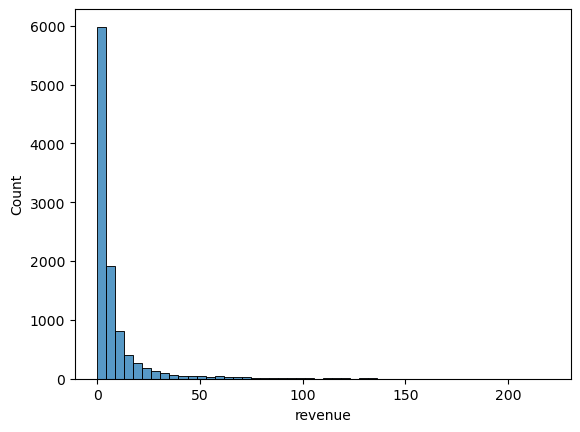

In [123]:
sns.histplot(data=stores_train['revenue'], bins=50)

### Investigating the different features

In [124]:
stores_train.dtypes

store_id                object
year                     int64
store_name              object
plaace_hierarchy_id     object
sales_channel_name      object
grunnkrets_id            int64
address                 object
lat                    float64
lon                    float64
chain_name              object
mall_name               object
revenue                float64
dtype: object

In [125]:
stores_train.describe()

,year,grunnkrets_id,lat,lon,revenue
count,10287.0,1.028700e+04,10287.000000,10287.000000,10287.000000
mean,2016.0,9.348313e+06,61.223094,10.005801,8.328546
std,0.0,5.794345e+06,2.969380,3.825401,15.659131
min,2016.0,1.010105e+06,57.994443,4.625889,0.000000
25%,2016.0,3.014302e+06,59.433541,7.223571,1.188000
50%,2016.0,9.065412e+06,59.941830,10.407527,3.363000
75%,2016.0,1.449020e+07,62.144366,10.850242,8.052500
max,2016.0,2.030031e+07,71.098287,31.118935,219.599000


store_id and year are redundant as they provide no information

In [126]:
stores_train["store_name"].nunique()


10265

Since there are so many unique store names, we omit this ATM

#### Plaace Hierarchy ID

In [127]:
stores_train["plaace_hierarchy_id"].value_counts()

3.2.4.0     959
2.8.1.0     879
2.4.6.0     700
3.2.1.0     605
1.1.6.2     499
2.7.1.0     386
1.1.7.0     385
1.1.6.4     339
2.6.3.2     322
1.2.4.0     279
2.2.1.0     275
3.6.1.0     261
2.9.4.0     219
2.9.8.0     218
1.1.9.0     193
3.3.3.0     191
1.3.2.0     186
2.1.6.0     164
2.8.2.0     161
1.1.6.1     158
3.3.5.0     154
3.3.6.0     142
1.1.5.0     139
2.3.1.0     138
1.1.6.3     123
3.2.2.0     107
2.9.3.0     103
2.9.1.0     103
2.1.2.0      99
2.4.2.0      98
2.9.2.0      87
1.1.2.0      85
2.7.2.0      80
2.7.5.0      80
2.5.2.0      76
2.6.2.0      75
2.1.1.0      67
2.8.10.0     67
3.4.3.0      67
2.4.1.0      61
2.1.4.0      61
2.3.2.0      57
2.7.6.0      55
3.4.2.0      52
2.6.1.0      47
2.3.4.0      46
2.1.3.0      41
1.2.2.0      38
2.4.5.0      37
2.9.5.0      37
1.1.4.0      35
2.6.6.1      34
2.9.9.0      32
1.2.3.0      32
2.6.5.0      25
3.3.4.0      24
2.7.3.0      23
2.3.3.0      22
2.8.6.0      22
2.8.4.0      20
1.1.1.0      19
1.1.3.0      19
2.8.5.0 

In [128]:
stores_train["plaace_hierarchy_id_6"] = stores_train["plaace_hierarchy_id"].apply(lambda x: x[:3])
stores_train["plaace_hierarchy_id_6"].value_counts()

1.1    1994
3.2    1671
2.8    1204
2.4     908
2.9     816
2.7     627
3.3     521
2.6     517
2.1     453
1.2     355
2.2     288
2.3     274
3.6     261
1.3     191
3.4     119
2.5      80
1.4       8
Name: plaace_hierarchy_id_6, dtype: int64

IDEA: split into 4 columns, first column contains only first number, second contains first two numbers...

IDEA: split the 4 numbers into 4 columns.

Treat as categorical variable

#### Sales Channel Name

In [129]:
stores_train["sales_channel_name"].value_counts()

Spas                                         959
Grocery stores                               879
Clothing stores                              700
Hairdressers                                 605
Restaurants                                  499
Other stores                                 386
Hotels with restaurants                      385
Belongs to dining                            339
Sporting goods stores                        322
Cafes                                        279
Gas stations                                 275
Gyms                                         261
Furniture stores                             219
Flower shops                                 218
Fast food                                    193
Photographers                                191
Pubs                                         186
Construction stores                          164
Kiosks                                       161
Eateries                                     158
Opticians           

Contains same information as plaace hierarchy id, redundant

#### Grunnkrets ID

In [130]:
stores_train["grunnkrets_id"]

2506      6020601
12305     2350203
4142      6240307
8561     15040206
818       3012312
           ...   
4859     18330207
3264     16017522
9845     15040101
10799    12012008
2732     20120607
Name: grunnkrets_id, Length: 10287, dtype: int64

Simply a foreign key to link to the other CSV files, will look at it later

#### Address

In [131]:
stores_train["address"].nunique()

6880

#### Lat & Long

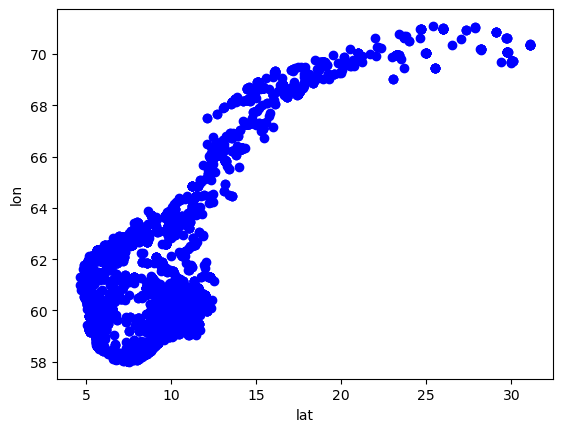

In [132]:
plt.plot(stores_train["lon"], stores_train["lat"], "bo")
plt.ylabel("lon")
plt.xlabel("lat")
plt.show();

#### Chain Name

In [133]:
# pd.set_option('display.max_rows', None)  # or 1000
stores_train["chain_name"].value_counts()

REMA FRANCHISE NORGE                      223
JOKER                                     132
BUNNPRIS                                   96
CIRCLE K DETALJIST                         94
MIX                                        86
INTERFLORA NORGE SA                        85
SPAR                                       71
NÆRBUTIKKEN                                58
KIWI NORGE                                 54
SPORT 1 BUTIKKENE                          53
YX NORGE                                   50
C OPTIKK                                   41
FARGERIKE                                  40
SPECSAVERS NORWAY                          39
CHOICE HOTELS & RESORTS                    38
ESSO NORGE                                 35
PIZZABAKEREN INVEST                        35
G-SPORT                                    35
NORSKE SHELL                               33
MX SPORT NORGE                             32
MØBELRINGEN                                31
BJØRKLUND NORGE                   

In [134]:
stores_train["chain_name"].isna().sum() / stores_train.shape[0]

0.7103139885292117

IMPUTE NANS: impute NANs as a category of its own. Can also treat the whole column as binary not-NAN/NAN. Can also decide threshold for when a chain becomes a NAN or another category altogether.

#### Mall Name

In [135]:
stores_train["mall_name"].value_counts().sum() / stores_train.shape[0]

0.17390881695343638

In [136]:
pd.set_option('display.max_rows', 500)
stores_train["mall_name"].value_counts()

Strømmen Storsenter               30
Amfi Moa                          22
Sandvika Storsenter               19
Kvadrat                           18
Jessheim Storsenter               15
Ski Storsenter                    14
Gulskogen Senter                  14
Amfi Borg                         13
Stovner Senter                    13
CC Gjøvik                         13
Lagunen Storsenter                13
Sørlandssenteret                  13
Amfi Finnsnes                     12
Amfi Madla                        12
CC Vest                           11
Torvbyen                          11
Herkules                          11
Knarvik Senter                    11
Storo Storsenter                  11
CC Hamar                          11
Triaden Lørenskog Storsenter      11
Vinterbro Senter                  11
Sartor Storsenter                 10
House of Oslo                     10
Vulkan                            10
Magasinet Drammen                 10
Amfi Førde                        10
J

Treat similarly to chain name, we think a binary approach would be the best as the size of a lot of malls seems to be wrong due to missing shops etc.

#### Revenue

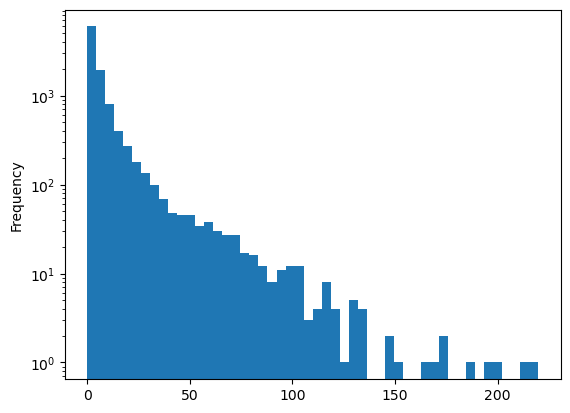

In [137]:
stores_train.revenue.plot.hist(bins=50, logy=True);

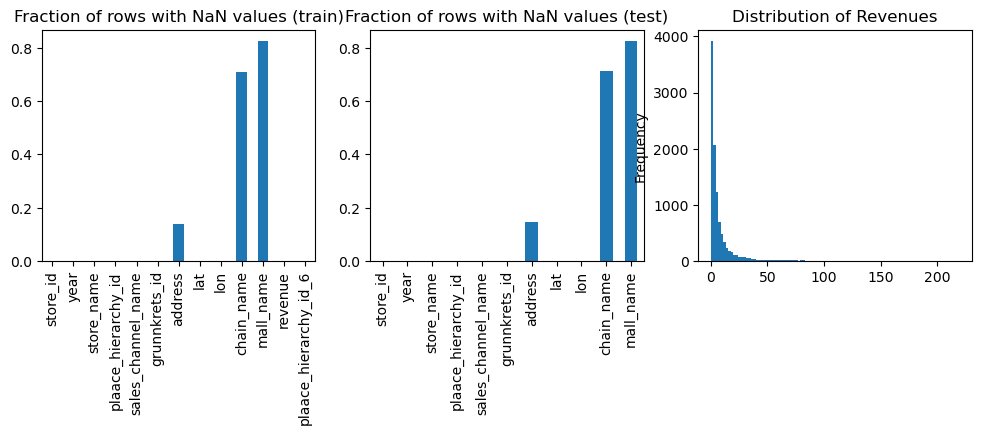

In [138]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 3), ncols=3)
stores_train.isna().mean().plot.bar(ax=ax1)
ax1.set_title('Fraction of rows with NaN values (train)')
stores_test.isna().mean().plot.bar(ax=ax2)
ax2.set_title('Fraction of rows with NaN values (test)')
stores_train.revenue.plot.hist(bins=100, ax=ax3)
ax3.set_title('Distribution of Revenues');

### Feature engineering

We start by including lat, lon, chain_name, mall_name and plaace_hierarchy_id

In [139]:
stores_train["is_mall"] = ~stores_train["mall_name"].isna()

In [140]:
lower_limit = 10

chain_count = stores_train["chain_name"].value_counts().to_dict()
chain_count[np.nan] = 0
stores_train["bounded_chain_name"] = stores_train["chain_name"].apply(lambda x: x if(chain_count[x] >= lower_limit) else "OTHER")
stores_train[["chain_name", "bounded_chain_name"]].head()

,chain_name,bounded_chain_name
2506,BAKER KLAUSEN DRAMMEN,OTHER
12305,NaN,OTHER
4142,EXPERT,EXPERT
8561,NaN,OTHER
818,NaN,OTHER


In [141]:
stores_train["plaace_cat_1"] = stores_train["plaace_hierarchy_id"].apply(lambda x: x[:1])
stores_train["plaace_cat_2"] = stores_train["plaace_hierarchy_id"].apply(lambda x: x[:3])
stores_train["plaace_cat_3"] = stores_train["plaace_hierarchy_id"].apply(lambda x: x[:5])
stores_train["plaace_cat_4"] = stores_train["plaace_hierarchy_id"]
stores_train[["plaace_cat_1", "plaace_cat_2", "plaace_cat_3", "plaace_cat_4"]].head()

,plaace_cat_1,plaace_cat_2,plaace_cat_3,plaace_cat_4
2506,1,1.2,1.2.2,1.2.2.0
12305,3,3.4,3.4.2,3.4.2.0
4142,2,2.3,2.3.1,2.3.1.0
8561,2,2.9,2.9.1,2.9.1.0
818,1,1.1,1.1.6,1.1.6.2


In [142]:
stores_train["plaace_cat_4"].unique()

array(['1.2.2.0', '3.4.2.0', '2.3.1.0', '2.9.1.0', '1.1.6.2', '3.2.4.0',
       '2.8.6.0', '2.4.6.0', '1.1.7.0', '1.2.4.0', '2.9.8.0', '2.1.2.0',
       '2.8.1.0', '2.6.3.2', '3.4.3.0', '2.8.2.0', '2.9.4.0', '3.3.6.0',
       '3.2.1.0', '2.3.2.0', '2.8.10.0', '2.6.6.1', '1.1.6.4', '2.9.2.0',
       '1.2.3.0', '2.2.1.0', '2.7.6.0', '2.9.3.0', '1.3.2.0', '3.3.3.0',
       '1.1.6.1', '2.7.2.0', '1.1.9.0', '3.2.2.0', '1.1.5.0', '2.5.2.0',
       '2.3.4.0', '2.7.5.0', '2.4.1.0', '2.1.6.0', '1.1.6.3', '2.8.3.0',
       '2.6.5.0', '2.9.9.0', '1.1.4.0', '2.7.1.0', '3.6.1.0', '2.6.2.0',
       '2.4.2.0', '2.1.1.0', '3.3.5.0', '2.1.3.0', '2.8.7.0', '2.4.4.0',
       '2.8.4.0', '2.1.4.0', '2.8.11.2', '2.7.3.0', '2.8.5.0', '2.6.1.0',
       '2.6.6.2', '1.1.2.0', '2.9.7.0', '2.4.5.0', '2.3.5.0', '2.3.3.0',
       '1.1.3.0', '3.3.4.0', '2.2.4.0', '3.3.7.0', '2.9.5.0', '2.1.5.0',
       '1.1.1.0', '2.1.7.0', '1.4.2.0', '1.2.1.0', '1.3.1.0', '2.6.4.0',
       '2.6.3.3', '2.5.1.0', '1.4.1.0', '3.3.2.0'

In [143]:
stores_train[stores_train["plaace_cat_1"] == "1"].shape

(2548, 19)

In [144]:
unique_vals = stores_train["plaace_cat_" + str(1)].unique()
unique_vals

array(['1', '3', '2'], dtype=object)

In [145]:
for val in unique_vals:
    filtered_df = stores_train[stores_train["plaace_cat_1"] == val]
    filtered_df["random"] = 1

/var/folders/0n/8hp9d_rj4_9d8vgrqztmqhf40000gn/T/ipykernel_36778/202574591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["random"] = 1


In [146]:
from scipy.spatial.distance import cdist


def closest_point(point, points):
    """ Find closest point from a list of points. """
    if(len(points) == 0):
        return None
    return points[cdist([point], points).argmin()]

**!NB**

Next cell can take up to 1 minute to run

In [147]:
stores_train["point"] = [(x, y) for x,y in zip(stores_train['lat'], stores_train['lon'])]
stores_train['closest'] = [closest_point(x["point"], list(stores_train.loc[stores_train["plaace_cat_3"] == x["plaace_cat_3"]]['point'].drop([i], axis=0))) for i, x in stores_train.iterrows()]

In [148]:
stores_train["closest"].isna().sum()

5

In [149]:
stores_train["closest"].head()

2506       (59.7810714029896, 10.4971149784371)
12305      (59.9224815637455, 11.1742995190455)
4142      (59.96577320581039, 9.99504792924738)
8561      (62.4712640586064, 6.337605165649361)
818      (59.9241550536053, 10.758884654304198)
Name: closest, dtype: object

In [150]:
for i, row in stores_train.iterrows():
    if(row["closest"] == None):
        val = float("inf")
    else:
        val = cdist(np.array(row["point"]).reshape(1, -1), np.array(row["closest"]).reshape(1, -1))
    stores_train.at[i,'dist_to_nearest_comp'] = val

In [151]:
stores_train.sample(5)

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,...,plaace_hierarchy_id_6,is_mall,bounded_chain_name,plaace_cat_1,plaace_cat_2,plaace_cat_3,plaace_cat_4,point,closest,dist_to_nearest_comp
11303,997891554-997910036-295069,2016,RØISLAND MARTHE NAPRAPAT AS,3.2.4.0,Spas,19030311,NaN,68.783329,16.538183,NaN,...,3.2,False,OTHER,3,3.2,3.2.4,3.2.4.0,"(68.7833288196265, 16.5381828233936)","(68.7996275940303, 16.5403015132516)",0.016436
6022,971505788-982662508-391413,2016,AKE AS,2.6.3.2,Sporting goods stores,8340206,NaN,59.697713,8.050911,NaN,...,2.6,False,OTHER,2,2.6,2.6.3,2.6.3.2,"(59.6977133719394, 8.05091066641182)","(59.7398050378278, 7.57657362424924)",0.476201
6732,989149903-914687020-734767,2016,HEBEL AS,2.7.1.0,Other stores,3015003,SETRA VEI 12 A,59.958453,10.664466,NaN,...,2.7,False,OTHER,2,2.7,2.7.1,2.7.1.0,"(59.9584532059758, 10.664465669880402)","(59.947167333530906, 10.6426143637991)",0.024594
7827,915199496-986144838-9653,2016,REMA 1000 SJØGATA SORTLAND SENTER,2.8.1.0,Grocery stores,18700207,SJØGATA,68.690904,15.418691,REMA FRANCHISE NORGE,...,2.8,False,REMA FRANCHISE NORGE,2,2.8,2.8.1,2.8.1.0,"(68.690904223385, 15.418691176023)","(68.6963759066518, 15.4147486830297)",0.006744
8347,882014142--15262-15262,2016,TORGKIOSKEN MIX HITRATORGET,2.8.2.0,Kiosks,16170203,NaN,63.598433,8.932793,MIX,...,2.8,True,MIX,2,2.8,2.8.2,2.8.2.0,"(63.5984326746504, 8.93279314962002)","(63.0753568262147, 8.23891168244672)",0.868953


In [152]:
from utils import create_geographical_columns


stores_train = create_geographical_columns(stores_train)

In [153]:
unq_vals = stores_train["plaace_cat_4"].unique()

In [154]:
rev_dict = {}
for val in unq_vals:
    rev_dict[val] = stores_train["revenue"].where(stores_train["plaace_cat_4"] == val).mean()

In [155]:
stores_train["mean_revenue"] = stores_train["plaace_cat_4"].apply(lambda x: rev_dict[x])

In [156]:
unq_vals

array(['1.2.2.0', '3.4.2.0', '2.3.1.0', '2.9.1.0', '1.1.6.2', '3.2.4.0',
       '2.8.6.0', '2.4.6.0', '1.1.7.0', '1.2.4.0', '2.9.8.0', '2.1.2.0',
       '2.8.1.0', '2.6.3.2', '3.4.3.0', '2.8.2.0', '2.9.4.0', '3.3.6.0',
       '3.2.1.0', '2.3.2.0', '2.8.10.0', '2.6.6.1', '1.1.6.4', '2.9.2.0',
       '1.2.3.0', '2.2.1.0', '2.7.6.0', '2.9.3.0', '1.3.2.0', '3.3.3.0',
       '1.1.6.1', '2.7.2.0', '1.1.9.0', '3.2.2.0', '1.1.5.0', '2.5.2.0',
       '2.3.4.0', '2.7.5.0', '2.4.1.0', '2.1.6.0', '1.1.6.3', '2.8.3.0',
       '2.6.5.0', '2.9.9.0', '1.1.4.0', '2.7.1.0', '3.6.1.0', '2.6.2.0',
       '2.4.2.0', '2.1.1.0', '3.3.5.0', '2.1.3.0', '2.8.7.0', '2.4.4.0',
       '2.8.4.0', '2.1.4.0', '2.8.11.2', '2.7.3.0', '2.8.5.0', '2.6.1.0',
       '2.6.6.2', '1.1.2.0', '2.9.7.0', '2.4.5.0', '2.3.5.0', '2.3.3.0',
       '1.1.3.0', '3.3.4.0', '2.2.4.0', '3.3.7.0', '2.9.5.0', '2.1.5.0',
       '1.1.1.0', '2.1.7.0', '1.4.2.0', '1.2.1.0', '1.3.1.0', '2.6.4.0',
       '2.6.3.3', '2.5.1.0', '1.4.1.0', '3.3.2.0'

In [157]:
chain_count = stores_train["chain_name"].value_counts().to_dict()
chain_count[np.nan] = 0
lower_limit = 10

rev_dict = {}
mean_revenue = stores_train.revenue.mean()
for val in unq_vals:
    rev_dict[val] = stores_train["revenue"].where(stores_train["plaace_cat_4"] == val).mean()

def mean_func_rev(plaace_cat):
    if(plaace_cat in rev_dict.keys()):
        return rev_dict[plaace_cat]
    return mean_revenue

def feature_engineer_df(
    df: pd.DataFrame, 
    chain_count: dict, 
    rev_dict: dict, 
    training: bool = True, 
    training_df: pd.DataFrame = None, 
    lower_limit: int = 10, 
    plaace_cat_granularity: int = 4
):
    if(training):
        training_df = df
    df["is_mall"] = ~df["mall_name"].isna()
    df["bounded_chain_name"] = df["chain_name"].apply(lambda x: x if(x in chain_count.keys() and chain_count[x] >= lower_limit) else "OTHER")
    df["plaace_cat_1"] = df["plaace_hierarchy_id"].apply(lambda x: x[:1])
    df["plaace_cat_2"] = df["plaace_hierarchy_id"].apply(lambda x: x[:3])
    df["plaace_cat_3"] = df["plaace_hierarchy_id"].apply(lambda x: x[:5])
    df["plaace_cat_4"] = df["plaace_hierarchy_id"]
    df["point"] = [(x, y) for x,y in zip(df['lat'], df['lon'])]
    if training:
        df['closest_' + str(plaace_cat_granularity)] = [
            closest_point(
                x["point"], 
                list(training_df.loc[
                    training_df["plaace_cat_" + str(plaace_cat_granularity)] == x["plaace_cat_" + str(plaace_cat_granularity)]
                    ]['point'].drop([i], axis=0))) for i, x in df.iterrows()
            ]
    else:
        df['closest_' + str(plaace_cat_granularity)] = [
            closest_point(
                x["point"], 
                list(training_df.loc[
                    training_df["plaace_cat_" + str(plaace_cat_granularity)] == x["plaace_cat_" + str(plaace_cat_granularity)]
                    ]['point'])) for i, x in df.iterrows()
            ]
    df["mean_revenue_" + str(plaace_cat_granularity)] = df["plaace_cat_" + str(plaace_cat_granularity)].apply(lambda x: mean_func_rev(x))
    for i, row in df.iterrows():
        if(row["closest_" + str(plaace_cat_granularity)] == None):
            val = np.nan
        else:
            val = cdist(np.array(row["point"]).reshape(1, -1), np.array(row["closest_" + str(plaace_cat_granularity)]).reshape(1, -1))
        df.at[i,'dist_to_nearest_comp'] = val
    df = create_geographical_columns(df)
    return df
    

In [158]:
for i in range(1, 5):
    stores_train = feature_engineer_df(stores_train, chain_count, rev_dict, plaace_cat_granularity=i)
    stores_val = feature_engineer_df(stores_val, chain_count, rev_dict, training=False, training_df=stores_train, plaace_cat_granularity=i)
    stores_test = feature_engineer_df(stores_test, chain_count, rev_dict, training=False, training_df=stores_train, plaace_cat_granularity=i)

In [159]:
stores_train.shape

(10287, 34)

## Preprocessing data & training model

We start by including lat, lon, chain_name, mall_name and plaace_hierarchy_id

In [160]:
from utils import preprocess_grunnkrets_df, create_geographical_columns

class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self


In [161]:
full_population_df = pd.read_csv("temp_data/full_population_data_train.csv")
closest_bus_stop_df = pd.read_csv("temp_data/closest_bus_stops_train.csv")

full_stores_train = stores_train.merge(full_population_df, left_on="store_id", right_on="store_id")
full_stores_train = full_stores_train.merge(closest_bus_stop_df, left_on="store_id", right_on="store_id")

In [162]:
full_stores_val = stores_val.merge(full_population_df, left_on="store_id", right_on="store_id")
full_stores_val = full_stores_val.merge(closest_bus_stop_df, left_on="store_id", right_on="store_id")

In [163]:
full_population_df_test = pd.read_csv("temp_data/full_population_data_test.csv")
closest_bus_stop_df_test = pd.read_csv("temp_data/closest_bus_stops_test.csv")

In [164]:
full_stores_test = stores_test.merge(full_population_df_test, left_on="store_id", right_on="store_id")
full_stores_test = full_stores_test.merge(closest_bus_stop_df_test, left_on="store_id", right_on="store_id")

In [190]:
fylke_relevant_features = [col_name for col_name in full_stores_train.columns if col_name.startswith("fylke.")]
kommune_relevant_features = [col_name for col_name in full_stores_train.columns if col_name.startswith("kommune.")]
delomrade_relevant_features = [col_name for col_name in full_stores_train.columns if col_name.startswith("delomrade.")]
grunnkrets_relevant_features = [col_name for col_name in full_stores_train.columns if col_name.startswith("grunnkrets_id.")]

In [182]:
log_delta = 0.1
full_stores_train["log_revenue"] = full_stores_train.revenue.apply(lambda x: np.log(x + log_delta))

In [211]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from utils import CustomTransformer


OE_categorical_features = ["bounded_chain_name", "kommune", "delomrade"]
OE_categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(missing_values=np.nan, strategy="constant")),
        ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    ]
)

OH_categorical_features = ["fylke", "plaace_cat_2"]
OH_categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(missing_values=np.nan, strategy="constant")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)


numerical_features = ["lat", "lon", "dist_to_nearest_comp", 
"mean_revenue_1", "mean_revenue_2", "mean_revenue_3", "mean_revenue_4", 
] + delomrade_relevant_features + list(closest_bus_stop_df.columns[1:])
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")), 
        ("scaler", StandardScaler(with_mean=True, with_std=True))]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("oe_cat", OE_categorical_transformer, OE_categorical_features),
        ("oh_cat", OH_categorical_transformer, OH_categorical_features),
        ("num", numerical_transformer, numerical_features),
    ],
    remainder='drop'
)


X_train = preprocessor.fit_transform(full_stores_train)
X_val = preprocessor.transform(full_stores_val)

In [212]:
y_train = np.array(full_stores_train.log_revenue)
y_val = np.array(full_stores_val.revenue)
mean_y = y_train.mean()
std_y = y_train.std()

y_train -= mean_y
y_train /= std_y

# Models

In [169]:
from sklearn.model_selection import GridSearchCV
from RMSLE import rmsle

## Random Forest Regressor

In [170]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=250, max_features=8, min_samples_leaf=2, min_samples_split=16)
rf_params = {
    "n_estimators" : (100, 250, 500, 1000), 
    "max_features" : (1, 2, 4, 8), 
    "min_samples_split" : (4, 8, 16, 32), 
    "min_samples_leaf" : (2, 4, 8), 
    }

rf_clf = GridSearchCV(rf, rf_params, verbose=2)

!NB Next cell takes several minutes to run (~5 minutes)

In [171]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=8, min_samples_leaf=2, min_samples_split=16,
                      n_estimators=250, n_jobs=-1, random_state=0)

In [172]:
rf_clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
rf_y_pred = rf.predict(X_val)
rmsle(y_pred=rf_y_pred, y_true=y_val)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression(n_jobs=-1)

In [ ]:
lr_clf.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
lr_y_pred = lr_clf.predict(X_val)

In [ ]:
lr_y_pred = np.array([max(0, xi) for xi in lr_y_pred])

In [ ]:
rmsle(y_pred=lr_y_pred, y_true=y_val)

1.6888796184753487

## Light GBM

In [ ]:
from lightgbm import LGBMRegressor

# Current best params
lgbm = LGBMRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, reg_lambda=0.01)
lgbm_params = {
    #"num_leaves" : (10, 25, 31, 75), 
    "learning_rate" : (0.05, 0.1, 0.25), 
    "n_estimators" : (50, 100, 250), 
    #"min_split_gain" : (0, 0.01, 0.1), 
    #"min_child_samples" : (4, 8, 16, 32), 
    "reg_alpha" : (0, 0.01, 0.1), 
    "reg_lambda" : (0, 0.01, 0.1), 
    }

lgbm_clf = GridSearchCV(lgbm, lgbm_params)

!NB Depending on the total possible configurations of hyperparams, the next cell can take veeeeery long 

In [ ]:
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=0, reg_lambda=0.01)

In [ ]:
lgbm_clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
lgbm_y_pred = lgbm.predict(X_val)

In [ ]:
lgbm_y_pred = np.array([max(0, xi) for xi in lgbm_y_pred])

In [ ]:
rmsle(y_pred=lgbm_y_pred, y_true=y_val)

## Stacking classifiers

In [213]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', rf), 
    ('lf', lr_clf), 
    ('lgbm', lgbm), 
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LGBMRegressor(n_estimators=50, random_state=5, n_jobs=-1)
)

In [214]:
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_features=8,
                                                     min_samples_leaf=2,
                                                     min_samples_split=16,
                                                     n_estimators=250,
                                                     n_jobs=-1,
                                                     random_state=0)),
                              ('lf', LinearRegression(n_jobs=-1)),
                              ('lgbm',
                               LGBMRegressor(random_state=0, reg_lambda=0.01))],
                  final_estimator=LGBMRegressor(n_estimators=50,
                                                random_state=5))

In [215]:
reg_y_pred = reg.predict(X_val)
reg_y_pred *= std_y
reg_y_pred += mean_y
reg_y_pred = np.exp(reg_y_pred) - log_delta

In [216]:
rmsle(y_pred=reg_y_pred, y_true=y_val)

0.7581507501134568

## Creating the submission

In [ ]:
# Predict on the test set 
X_test = preprocessor.transform(full_stores_test)
y_test_pred = reg.predict(X_test)
y_test_pred *= std_y
y_test_pred += mean_y
y_test_pred = np.exp(y_test_pred) - log_delta

# Generate submission dataframe 
# NOTE: It is important that the ID and predicted values match
submission = pd.DataFrame()
submission['id'] = stores_test.store_id 
submission['predicted'] = np.asarray(y_test_pred)

# Save it to disk (`index=False` means don't save the index in the csv)
submission.to_csv('submission.csv', index=False)